In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fake reviews dataset.csv')

In [3]:
df.sample(5)

,category,rating,label,text_
15156,Movies_and_TV_5,4.0,OR,"In her directorial debut, 27-year-old writer/d..."
5033,Sports_and_Outdoors_5,5.0,CG,Perfect fit and great delivery.I love the mate...
33707,Toys_and_Games_5,5.0,CG,Spidey is for my grandson and he loves it!Very...
32538,Books_5,4.0,CG,Very interesting book. I recommend it highly. ...
19572,Pet_Supplies_5,5.0,CG,DOES THE JOB WITH NO HURRY!! I've tried other...


In [4]:
df.shape

(40432, 4)

# 1. Data Cleaning

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
df.rename(columns={'text_':'text','label':'target'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,category,rating,target,text
6756,Sports_and_Outdoors_5,5.0,1,"Well, not ""I' exactly. I bought these for my ..."
33682,Toys_and_Games_5,5.0,0,Very fun card game. Gather some friends and pl...
38992,Clothing_Shoes_and_Jewelry_5,4.0,1,I bought a large and it fits a little tighter ...
10467,Electronics_5,5.0,1,It works great! Only thing you need to know i...
37310,Clothing_Shoes_and_Jewelry_5,4.0,0,great backpack lots of space and a nice qualit...


In [11]:
df.isnull().sum()

category    0
rating      0
target      0
text        0
dtype: int64

In [12]:
df.duplicated().sum()

12

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

# 2.EDA

In [16]:
df['target'].value_counts()

target
1    20215
0    20205
Name: count, dtype: int64

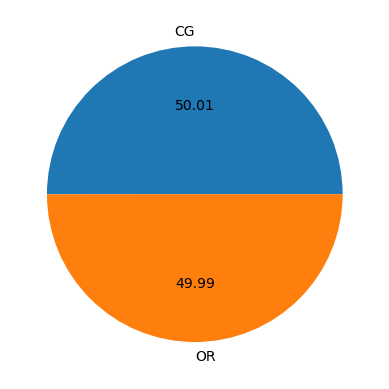

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['CG','OR'],autopct="%0.2f")
plt.show()

In [18]:
# Data is balanced

In [19]:
import nltk

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Utsav
[nltk_data]     yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,category,rating,target,text,num_characters
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85


In [23]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,category,rating,target,text,num_characters,num_words
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,category,rating,target,text,num_characters,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,40420.000000,40420.000000,40420.000000
mean,351.321227,76.681692,5.276695
std,369.850284,79.238220,4.914669
min,24.000000,2.000000,1.000000
25%,107.000000,24.000000,2.000000
50%,198.000000,44.000000,3.000000
75%,439.000000,96.000000,6.000000
max,2827.000000,510.000000,133.000000


In [28]:
# computer generated
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20205.000000,20205.000000,20205.000000
mean,305.646523,69.247661,5.454838
std,307.089932,69.672653,5.306643
min,24.000000,2.000000,1.000000
25%,96.000000,21.000000,2.000000
50%,174.000000,39.000000,3.000000
75%,383.000000,87.000000,7.000000
max,1717.000000,344.000000,133.000000


In [29]:
# Original reviews
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,396.973337,84.112046,5.098640
std,418.438191,87.133606,4.481878
min,28.000000,7.000000,1.000000
25%,121.000000,26.000000,2.000000
50%,224.000000,48.000000,4.000000
75%,498.000000,106.000000,6.000000
max,2827.000000,510.000000,51.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

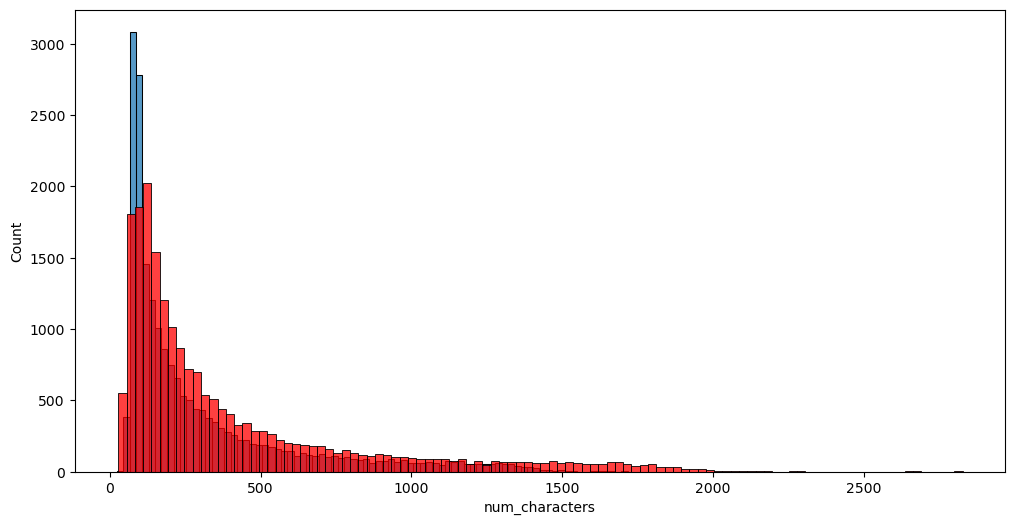

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

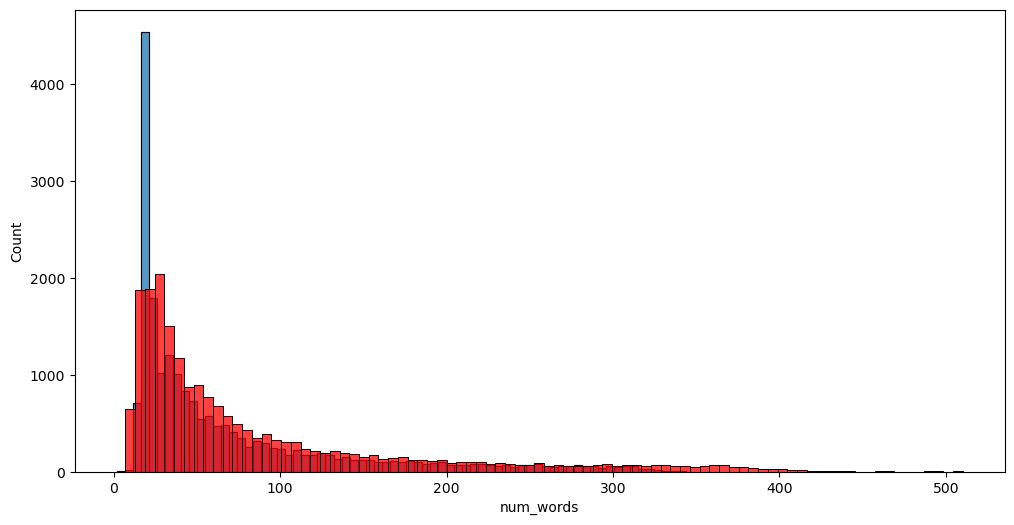

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

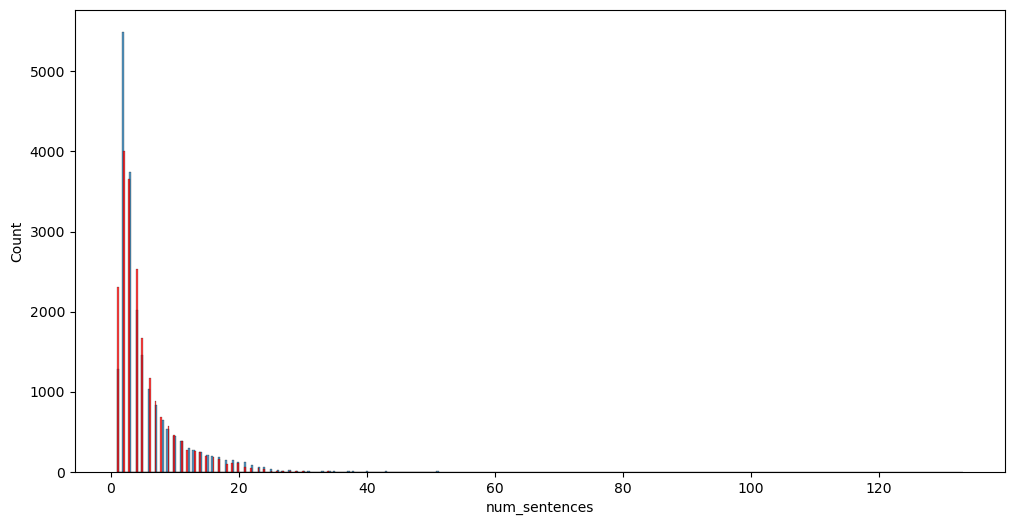

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

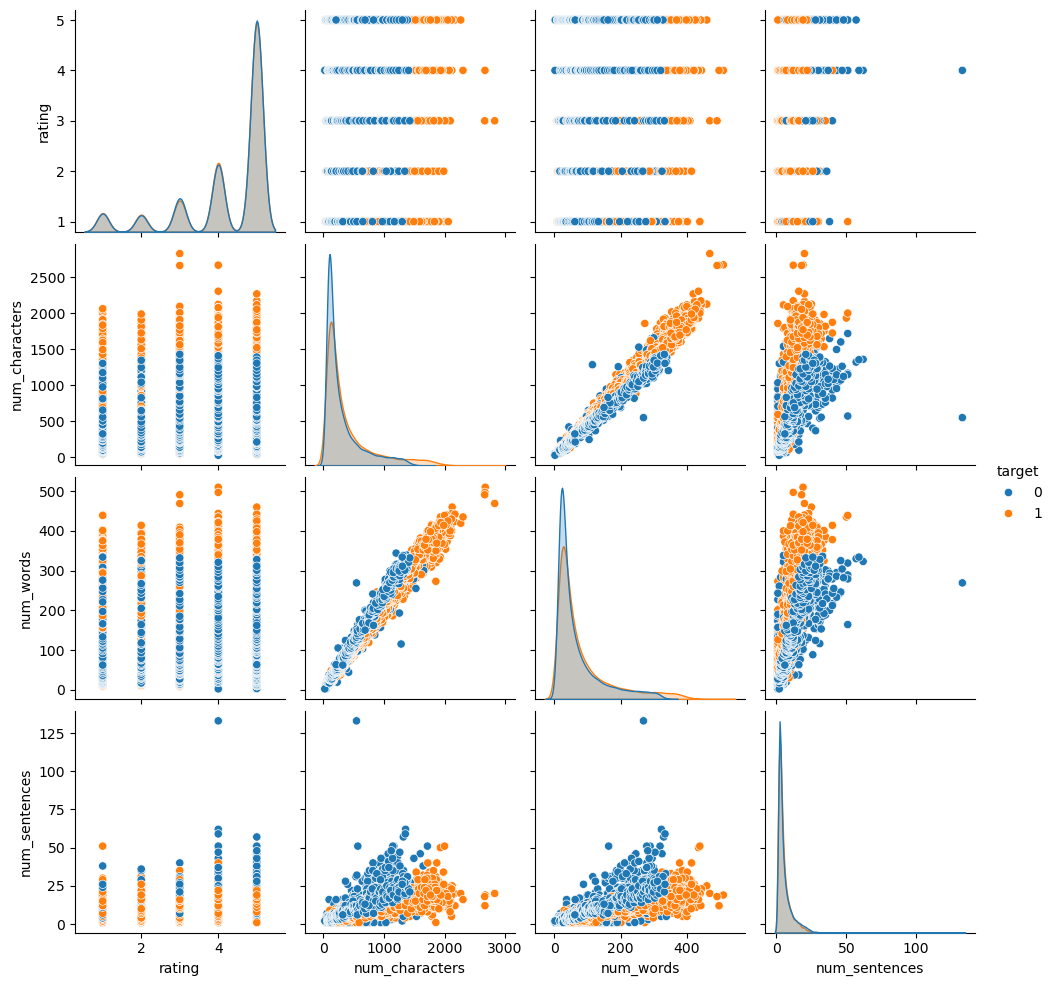

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

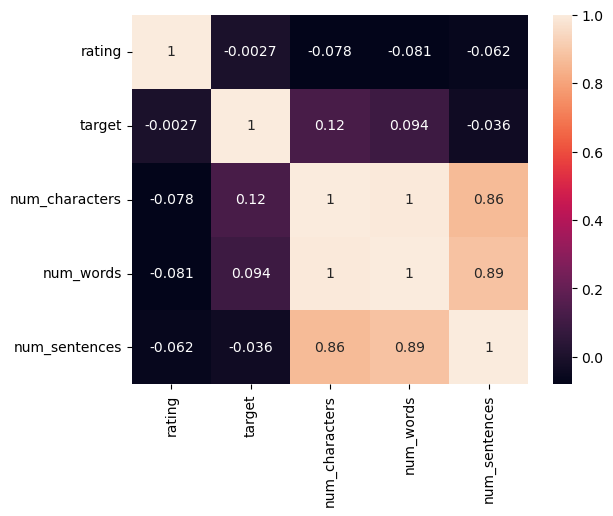

In [35]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Load once outside the function
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def transform_text(text):
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())
    
    # Filter tokens and apply stemming in one pass
    processed_words = [
        ps.stem(word) 
        for word in tokens 
        if word.isalnum() and word not in stop_words and word not in punctuations
    ]
    
    return " ".join(processed_words)


In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.sample(15)

,category,rating,target,text,num_characters,num_words,num_sentences,transformed_text
2738,Home_and_Kitchen_5,5.0,0,Most hotels nowadays aren't even close to the ...,253,58,3,hotel nowaday even close qualiti reason give 5...
35810,Toys_and_Games_5,4.0,0,"I like the quality of this set, the materials ...",402,94,5,like qualiti set materi thick sturdi figur stu...
33624,Toys_and_Games_5,5.0,0,"Dexterity to build, fun, visual, educational, ...",75,18,2,dexter build fun visual educ fun admit
27962,Kindle_Store_5,5.0,1,"Another thoroughly captivating, kept-me-up-rea...",1270,238,8,anoth thoroughli captiv stori josh lanyon stor...
13269,Movies_and_TV_5,5.0,0,"I have enjoyed both movies, and will watch bot...",137,30,4,enjoy movi watch keep eye peel two great movi ...
33224,Toys_and_Games_5,1.0,1,Very disappointed in this product. Couldn't wa...,85,19,3,disappoint product could wait get everyth stick
2481,Home_and_Kitchen_5,3.0,1,"like someone else mentioned, this doesn't work...",281,59,2,like someon els mention work headphon long hau...
38343,Clothing_Shoes_and_Jewelry_5,5.0,0,OMG I LOVE these shoes! They are comfortable a...,135,28,3,omg love shoe comfort look great husband wear ...
17272,Tools_and_Home_Improvement_5,5.0,1,I must have a dozen sets of hex keys but they ...,177,38,3,must dozen set hex key miss piec set hold wren...
34368,Toys_and_Games_5,5.0,0,These puzzles are high quality. We have had th...,146,31,3,puzzl high qualiti wooden puzzl long time kid ...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

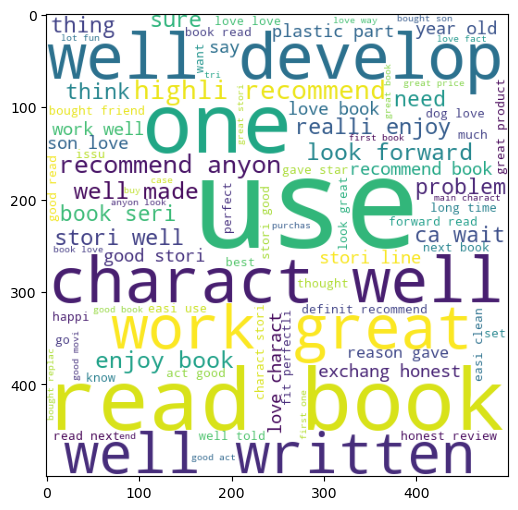

In [42]:
computer_generated = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(computer_generated)

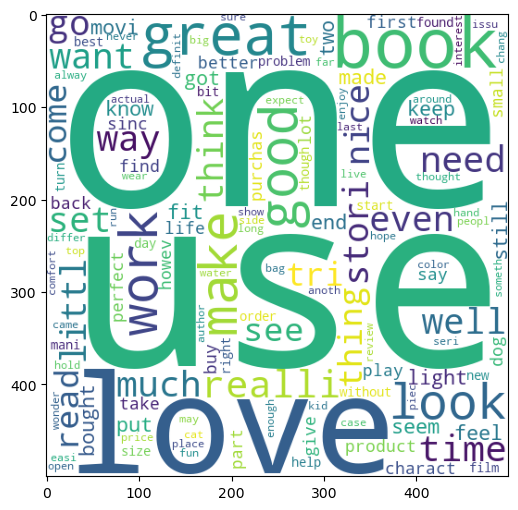

In [43]:
original = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(original)

In [44]:
CG_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        CG_corpus.append(word)
        
len(CG_corpus)

517889

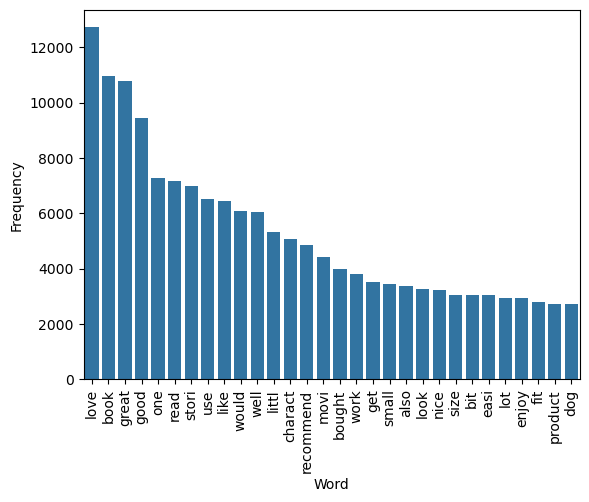

In [46]:
from collections import Counter
common_words = pd.DataFrame(Counter(CG_corpus).most_common(30))
common_words.columns = ['Word', 'Frequency']
sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
OR_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        OR_corpus.append(word)
        
len(OR_corpus)

729371

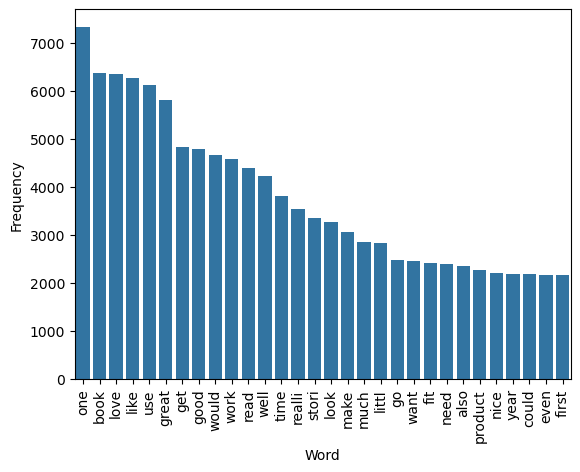

In [50]:
common_words = pd.DataFrame(Counter(OR_corpus).most_common(30))
common_words.columns = ['Word', 'Frequency']
sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()